<a href="https://colab.research.google.com/github/decci027/datascience_a2/blob/main/Unit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context: Strikes are collective actions where workers stop working to demand better wages, benefits, or working conditions. In 2023, the U.S. saw a major increase in strike activity, with workers from sectors like education, healthcare, and manufacturing pushing back against unfair labor practices. Strikes raise public awareness about labor issues, pressuring employers and lawmakers to address workers' rights. They can disrupt industries but also lead to important improvements for the workforce when successful.

In [2]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 937.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1

In [6]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

In [4]:
url_strike = 'https://raw.githubusercontent.com/decci027/datascience_a2/refs/heads/main/unit3_project%20-%20Sheet1.csv'

<Axes: >

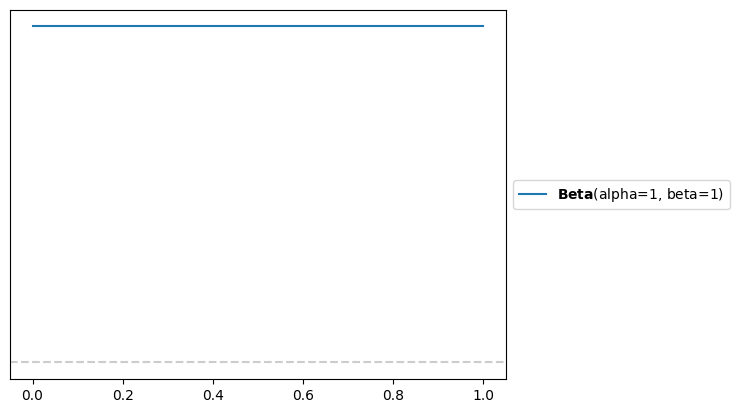

In [7]:
dist = pz.Beta(alpha=1, beta=1)
dist.plot_pdf()

μ (mean): We're assuming that the mean could range anywhere between 0 and 1.75 million with equal likelihood. This uniform prior doesn’t favor any specific value, making it a seemingly non-informative choice.

<Axes: >

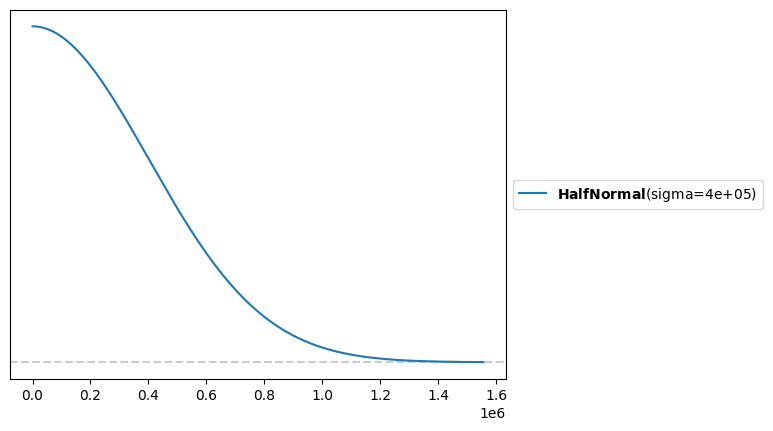

In [10]:
pz.HalfNormal(sigma = 400000).plot_pdf()

σ (standard deviation): I'm using a half-normal distribution with a scale of 400,000. This means I expect the standard deviation to likely be around that value.

Prior: These priors are chosen to be relatively uninformative or weakly informative, allowing the data to drive the inference process. The uniform prior for the mean ensures that a wide range of possible values is considered. The half-normal prior for the standard deviation provides a reasonable starting point for the variability while ensuring it remains positive.

(just decided to manually insert my data here:)

In [5]:
data_strike = [1400000, 1796000, 965000, 1519000, 1212000, 1006000, 1021000, 795000,
    728900, 655800, 909400, 376000, 323900, 533100, 174400, 118300, 452100,
    184900, 392000, 363800, 181900, 322200, 191500, 272700, 338600, 386800,
    72600, 393700, 99100, 45900, 129200, 170700, 99600, 70100, 189200,
    72200, 12500, 44500, 112500, 148100, 54500, 34300, 47300, 99400,
    25300, 485200, 425500, 27000, 80700, 120600, 458900]

(array([25.,  6.,  9.,  1.,  2.,  4.,  1.,  1.,  1.,  1.]),
 array([  12500.,  190850.,  369200.,  547550.,  725900.,  904250.,
        1082600., 1260950., 1439300., 1617650., 1796000.]),
 <BarContainer object of 10 artists>)

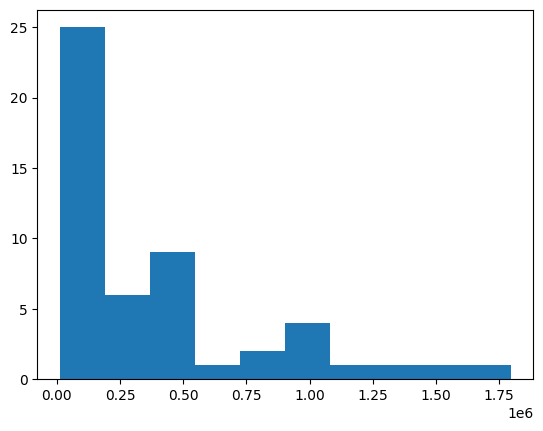

In [6]:
plt.hist(data_strike)

In [7]:
#N for normal
with pm.Model() as model_strike:
    μ = pm.Uniform('μ', lower=0, upper=1750000)
    σ = pm.HalfNormal('σ', sigma=400000)
    #standard deviation
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_strike)
    idata_strike = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

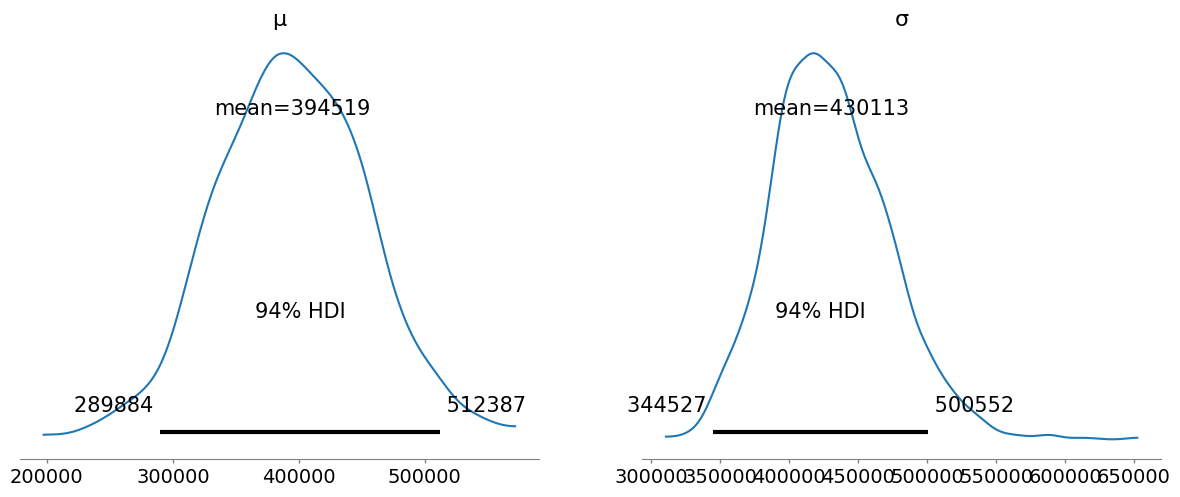

In [8]:
az.plot_posterior(idata_strike)

In [9]:
pm.sample_posterior_predictive(idata_strike, model=model_strike, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

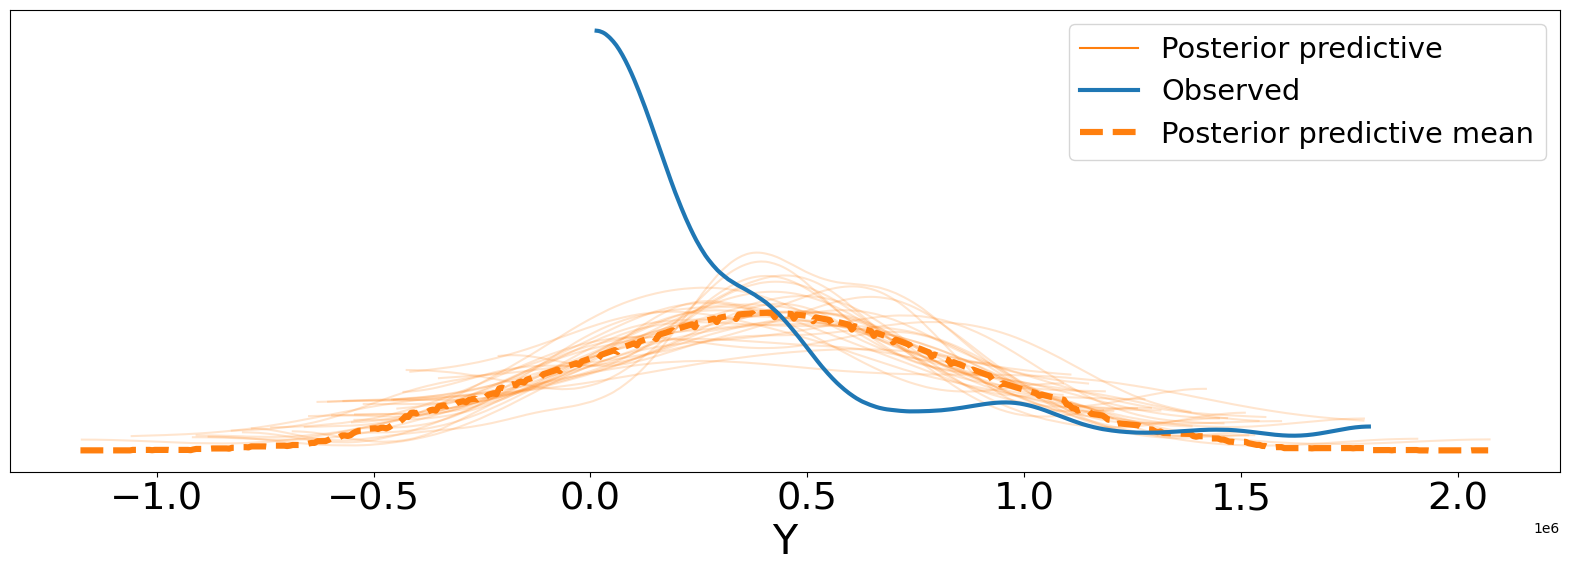

In [10]:
az.plot_ppc(idata_strike, num_pp_samples=30, figsize=(20, 6), colors=["C1", "C0", "C1"])

In [11]:
#ST is for skew T
with pm.Model() as model_strike:
    #same weak prior
    μ = pm.Uniform('μ', lower=0, upper=1750000)

    #same as before
    σ = pm.HalfNormal('σ', sigma=426000)

    #when a is larger than b, the dist. is positively skewed
    a = pm.HalfNormal('a', sigma=10)
    b = pm.HalfNormal('b', sigma=2)

    #SkewStudentR, which is the same as a T, except with more unusually high
    #or unusually low values.
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=data_strike)
    idata_strike = pm.sample()

Output()

Output()

In [12]:
pm.sample_posterior_predictive(idata_strike, model=model_strike, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 1750000.0)

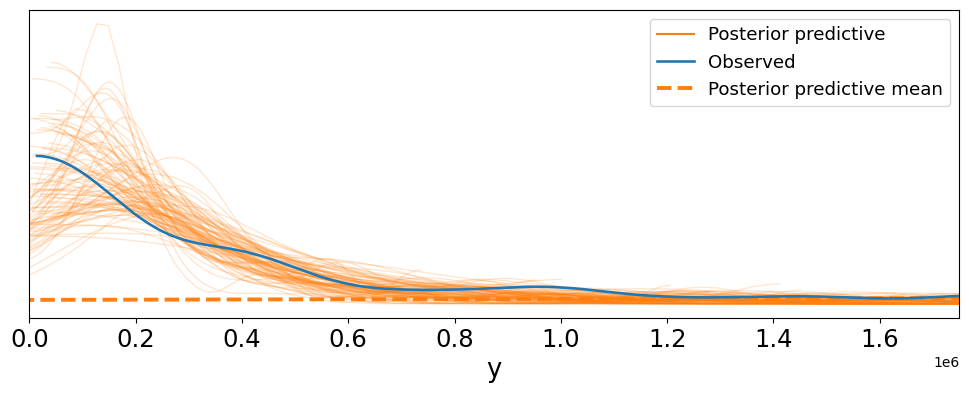

In [13]:
ax = az.plot_ppc(idata_strike, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(0, 1750000)

In [14]:
#T is for Student's T distribution
with pm.Model() as model_strike:
    # weak prior
    μ = pm.Uniform('μ', lower=0, upper=1750000)

    #the same as before
    σ = pm.HalfNormal('σ', sigma=400000)

    #this is our normality parameter; lam = 1/30 gives a mean of 30
    ν = pm.Exponential('ν', lam = 1/30)

    #new likelihood, same data
    y = pm.StudentT('y', mu=μ, sigma=σ, nu = ν, observed=data_strike)
    idata_strike = pm.sample()

Output()

Output()

In [15]:
pm.sample_posterior_predictive(idata_strike, model=model_strike, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(750000.0, 1750000.0)

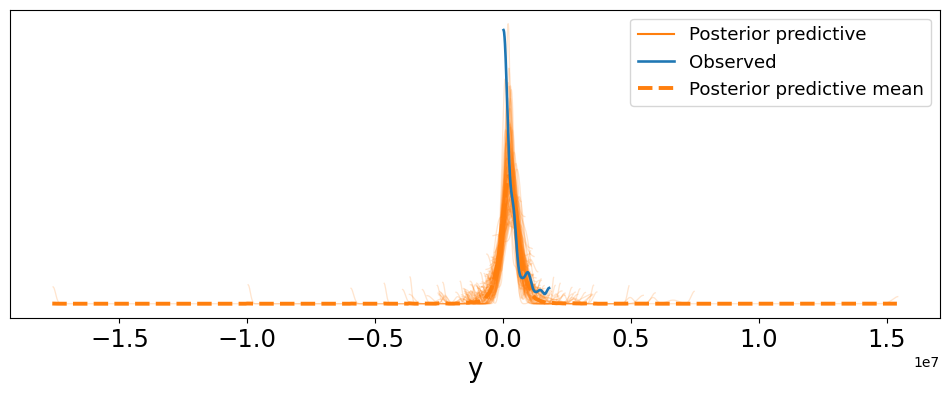

In [37]:
x = az.plot_ppc(idata_strike, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(750000, 1750000)

Posterior: These data points represent the number of workers involved in strikes, and they help shape the posterior distribution by updating your priors (initial guesses) with actual evidence. By incorporating this data, the Bayesian framework adjusts the probability of different parameter values (like the mean and standard deviation) based on how well they explain the data. The posterior distribution gives a refined view of the parameters, showing their most likely values after accounting for the observed strike activity.

Conclusion: I think the conclusion could be is that strike activity fluctuates significantly, with larger actions involving over a million participants, while smaller ones see far fewer. This variation reflects how different sectors and conditions lead to varying scales of labor protests. The data can inform models predicting future strike sizes and their economic impact, helping to understand trends in worker discontent and the effectiveness of strikes as a tool for change.